In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

In [2]:
# 중산층 소비자 층 데이터

pd.read_csv('./middle.csv - middle.csv.csv')

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0
...,...,...,...,...,...,...
95,0.170611,0.656753,0.478071,0.319717,0.312484,1
96,0.393424,0.927768,0.239522,0.489993,0.304990,1
97,0.348236,0.758736,0.304017,0.252886,0.245836,1
98,0.378175,0.606787,0.182603,0.473498,0.297998,0


In [3]:
middle = pd.read_csv('./middle.csv - middle.csv.csv')

In [4]:
middle

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0
...,...,...,...,...,...,...
95,0.170611,0.656753,0.478071,0.319717,0.312484,1
96,0.393424,0.927768,0.239522,0.489993,0.304990,1
97,0.348236,0.758736,0.304017,0.252886,0.245836,1
98,0.378175,0.606787,0.182603,0.473498,0.297998,0


In [5]:
# 데이터 정규화 (컬럼 단위가 다르기 때문)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [6]:
middle_regu = scaler.fit_transform(middle)

In [8]:
middle_regu = pd.DataFrame(middle_regu)
middle_regu.columns = ['food', 'book', 'cul', 'cloth', 'travel', 'status']
middle_regu

,food,book,cul,cloth,travel,status
0,-0.679491,0.285453,0.769363,-0.392849,1.161096,0.670280
1,-1.366491,-0.793116,-1.704388,-0.177986,0.731897,0.670280
2,1.762079,-1.082473,1.588480,-0.114819,1.757418,-1.491914
3,0.533770,-0.490561,0.311090,-0.546207,-1.303885,0.670280
4,0.863950,-0.588070,0.356134,3.120538,1.546859,-1.491914
...,...,...,...,...,...,...
95,-1.578440,-0.166059,0.828053,-0.831106,0.817433,0.670280
96,0.589127,1.025649,-1.540227,0.791461,0.679229,0.670280
97,0.149533,0.282381,-0.899934,-1.467939,-0.411665,0.670280
98,0.440784,-0.385771,-2.105312,0.634279,0.550286,-1.491914


In [11]:
x = middle_regu.drop(columns = 'status', axis = 1)
y = middle_regu.status

In [12]:
model = svm.SVR()
model.fit(x, y)

SVR()

In [13]:
r2 = model.score(x, y)

In [15]:
print('결정 계수: ', r2)

결정 계수:  0.6082849462996812


In [18]:
pred = model.predict(x)

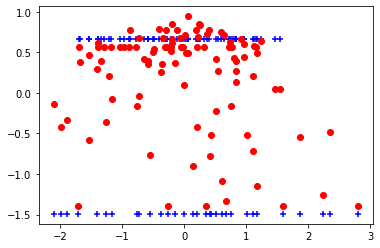

In [21]:
plt.scatter(x.iloc[:,2], y, marker="+", c='blue') # 실제 값
plt.scatter(x.iloc[:,2], pred, marker="o", c='red') # 예측 값
plt.show()

In [26]:
# 예측 값
pred_list = list(pred > 0)

In [27]:
# 실제 값
origin_list = list(middle.status == 1)

In [28]:
# 예측값과 실제값 비교 --> 같을 수록 좋은 것

sum([pred_list[i] == origin_list[i] for i in range(0, len(pred_list))]) / len(pred_list)

0.95

95